<a href="https://colab.research.google.com/github/Supratim0406/Skin-Cancer-Detection-System-CNN-TransferLearning/blob/main/Skin%20Cancer%20Detection%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# Upload kaggle API token and then proceed with

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
## Download Dataset
!kaggle datasets download -d bhaveshmittal/melanoma-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset
License(s): CC0-1.0
 53% 42.0M/79.4M [00:00<00:00, 429MB/s]
100% 79.4M/79.4M [00:00<00:00, 492MB/s]


In [ ]:
# import libraries
import os
from zipfile import ZipFile

target_directory = '/content/melanoma_data'

# Create the directory if it doesn't exist
os.makedirs(target_directory, exist_ok=True)

# Unzip the dataset
with ZipFile('/content/melanoma-cancer-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(target_directory)

##Import Libraries

In [ ]:
# Basic numerical and scientific computing libraries
import numpy as np
import tensorflow as tf

# Image processing and data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Neural Network Building Blocks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,           # For convolutional layers
    MaxPooling2D,     # For pooling layers
    Dense,            # For fully connected layers
    Flatten,          # To flatten the output
    Dropout,          # For regularization
    BatchNormalization,  # For normalizing layer inputs
    GlobalAveragePooling2D  # Alternative to Flatten
)

# Callbacks for training optimization
from tensorflow.keras.callbacks import (
    EarlyStopping,      # Stops training when model stops improving
    ReduceLROnPlateau   # Reduces learning rate when metrics plateau
)

# Evaluation and Visualization tools
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [ ]:
## Dataset Directories
BASE_DIR = "/content/melanoma_data"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR = os.path.join(BASE_DIR, "test")

In [30]:
## Total images for Benign & Malignant
benign=len(os.listdir(TRAIN_DIR+'/'+'Benign')+os.listdir(TEST_DIR+'/'+'Benign'))
maliganat=len(os.listdir(TRAIN_DIR+'/'+'Malignant')+os.listdir(TEST_DIR+'/'+'Malignant'))
print(f"number of images benign: {benign}")
print(f"number of images maliganat: {maliganat}")

number of images benign: 7289
number of images maliganat: 6590


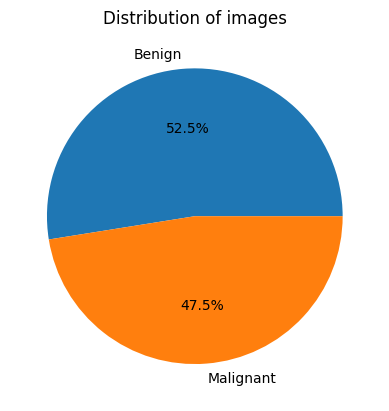

In [31]:
# plot pie chart to show Benign & malignant ratio

plt.pie([benign, maliganat], labels=['Benign', 'Malignant'], autopct='%1.1f%%')
plt.title("Distribution of images")
plt.show()

In [ ]:

## Image (Width, Height) and Batch Size
IMG_SIZE = (224, 224) #Optimal Size
BATCH_SIZE=32

# Data Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255, #Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Rescaling only for testing data
test_datagen = ImageDataGenerator(rescale = 1./255)

## Load Training Data
train_generator = train_datagen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = "binary"  #Binary classification
)

## Load Testing Data
test_generator = test_datagen.flow_from_directory(
    directory = TEST_DIR,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = "binary"  #Binary classification
)

## Print class labels
print("Class Mappings: ",train_generator.class_indices)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Class Mappings:  {'Benign': 0, 'Malignant': 1}


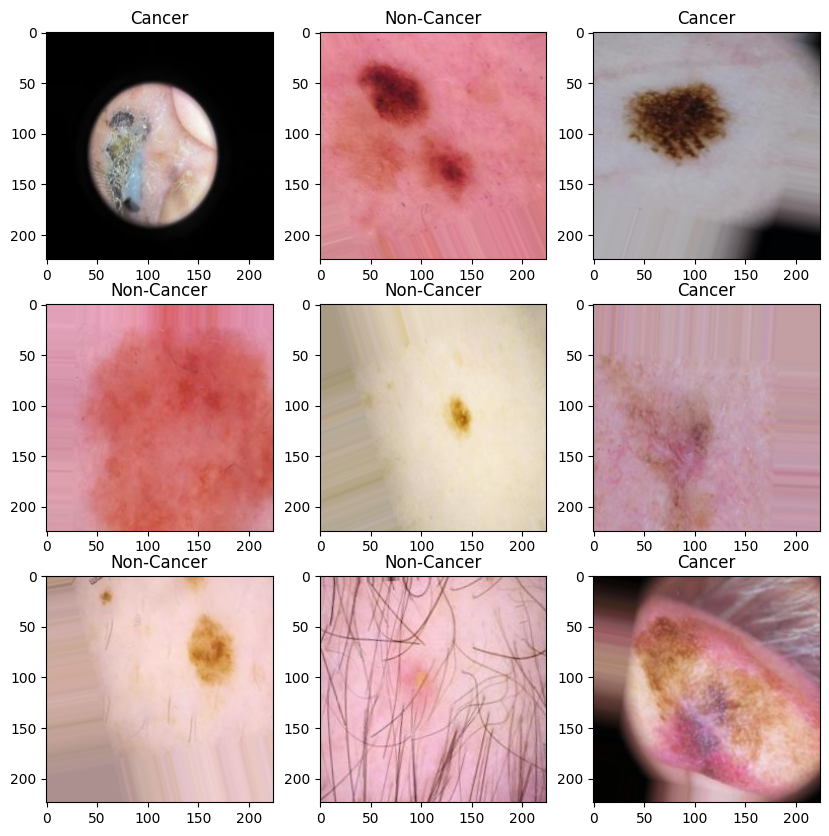

In [ ]:
## Create a function to display sample image from the dataset
def plot_images(generator):
    images, labels = next(generator)
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title('Cancer' if labels[i]==1 else 'Non-Cancer')
    plt.show()

## Plot 9 random images from training dataset
plot_images(train_generator)

## Building CNN model

In [ ]:
    from tensorflow.keras import models, layers

    input_shape = (224, 224, 3)

    ## In CNN, we have two parts. 1.Feature extractor 2. Classification (Fully Connected Layers)
    model = models.Sequential()

    # 1st Convolution Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # 2nd Convolution Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    ## 3rd Convolution Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    ## Classification - Flattening into 1D array
    model.add(layers.Flatten())

    ## Fully Connected Layer
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5)) ## To prevent overfitting
    model.add(layers.Dense(1, activation='sigmoid'))  ## Output layres for binary classification

    # Compile model
    model.compile(optimizer = 'adam', ## optimizer for faster convergence
                  loss='binary_crossentropy', ## Loss for binary classification
                  metrics = ['accuracy'])

    model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

## Train & Evaluate Model

In [ ]:
# EarlyStopping to stop training when the model stops improving
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,  # Stop training after 5 epochs with no improvement
    restore_best_weights=True,
    verbose=1
)

# ReduceLROnPlateau to reduce the learning rate if the model stops improving
lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,  # Reduce LR if no improvement after 3 epochs
    min_lr=1e-7,
    verbose=1
)

history = model.fit(
    train_generator,
    ## This determines how many batches of samples from train_generator to use in one epoch.
    ## It's calculated as the total number of samples divided by the batch size.
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,  # This model will train for a max of 50 epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 155s 395ms/step - accuracy: 0.6938 - loss: 0.7944 - val_accuracy: 0.8110 - val_loss: 0.4310 - learning_rate: 0.0010
Epoch 2/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8125 - loss: 0.3902 - val_accuracy: 0.8105 - val_loss: 0.4303 - learning_rate: 0.0010
Epoch 3/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 141s 379ms/step - accuracy: 0.8085 - loss: 0.4307 - val_accuracy: 0.8306 - val_loss: 0.3928 - learning_rate: 0.0010
Epoch 4/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7812 - loss: 0.4270 - val_accuracy: 0.8317 - val_loss: 0.3983 - learning_rate: 0.0010
Epoch 5/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 140s 378ms/step - accuracy: 0.8240 - loss: 0.3882 - val_accuracy: 0.8281 - val_loss: 0.3776 - learning_rate: 0.0010
Epoch 6/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6875 - loss: 0.5422 - val_accuracy: 0.8619 - val_loss: 0.3574 - learning_rate: 0.0010
Epoch 7/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 139s 375ms/step - accuracy: 0.8277 -

## Train and Evaluate Model

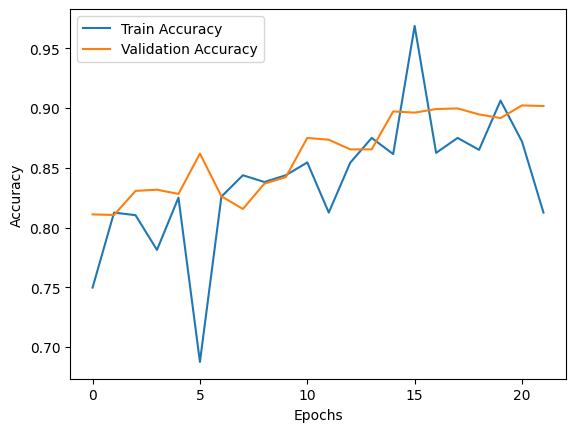

In [ ]:
# Plot Training History - Accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

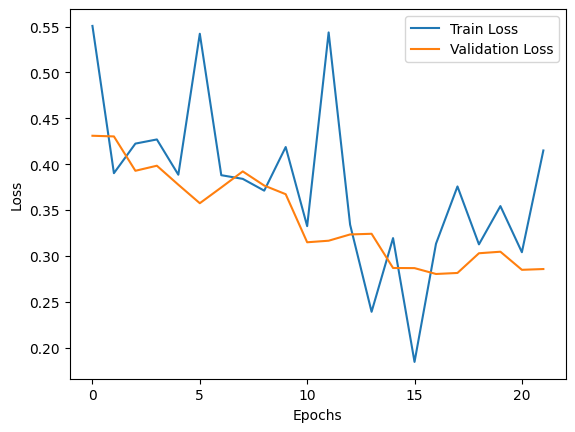

In [ ]:
# Plot Training History - Loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [32]:
test_loss,test_acc=model.evaluate(test_generator)
print(test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.8951 - loss: 0.2948
0.8989999890327454


## Evaluate Model performance

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1000
           1       0.51      0.51      0.51       984

    accuracy                           0.51      1984
   macro avg       0.51      0.51      0.51      1984
weighted avg       0.51      0.51      0.51      1984



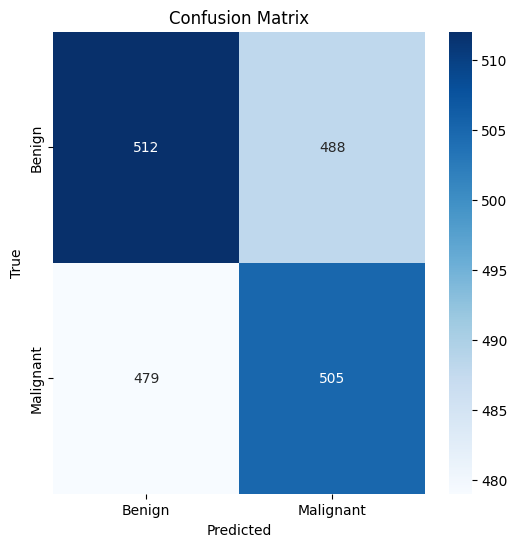

In [18]:
# Predict on the test set
test_pred = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE, verbose=1)

# Convert predictions to binary labels (0 or 1)
test_pred_labels = (test_pred > 0.5).astype("int32")

# Get the true labels
test_true_labels = test_generator.classes[:len(test_pred_labels)]  # Match length to predictions

# Classification report
print("Classification Report:")
print(classification_report(test_true_labels, test_pred_labels))

# Confusion Matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Save Model
model.save('skin_cancer_cnn.keras')


## Predcition system

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the entire model
model = load_model('/content/skin_cancer_cnn.keras')


def predict_skin_cancer(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))  # Load Image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make Prediction
    prediction = model.predict(img_array)
    class_label = "Malignant" if prediction > 0.5 else "Benign"

    # Show Image with Prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_label}")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step


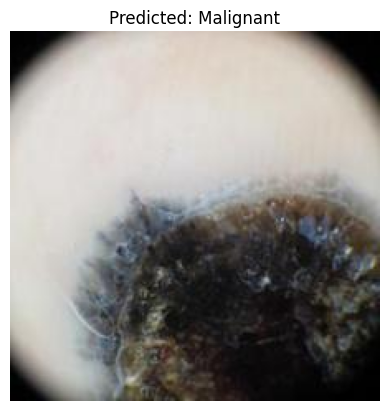

In [23]:
# Test on new image
predict_skin_cancer("/content/melanoma_data/test/Malignant/5606.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


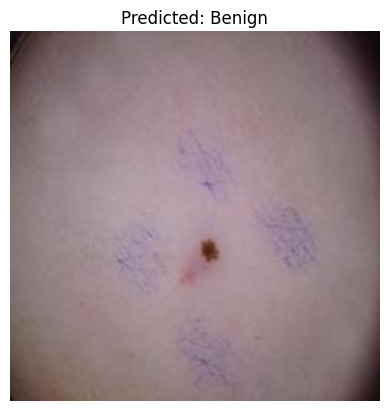

In [25]:
## Test on new image
predict_skin_cancer("/content/melanoma_data/test/Benign/6330.jpg", model)